In [3]:
# import packages
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [4]:
# import the dataset
df= pd.read_csv('cereal.csv')
df.head(1)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973


In [96]:
# check for null values
df.count()

name        77
mfr         77
type        77
calories    77
protein     77
fat         77
sodium      77
fiber       77
carbo       77
sugars      77
potass      77
vitamins    77
shelf       77
weight      77
cups        77
rating      77
dtype: int64

In [97]:
# data types of columns
df.dtypes

name         object
mfr          object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars        int64
potass        int64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

In [5]:
# Calculate the market share of each manufacturer based on the number of cereals they produce.
MS=df.mfr.value_counts()
MS

mfr
K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: count, dtype: int64

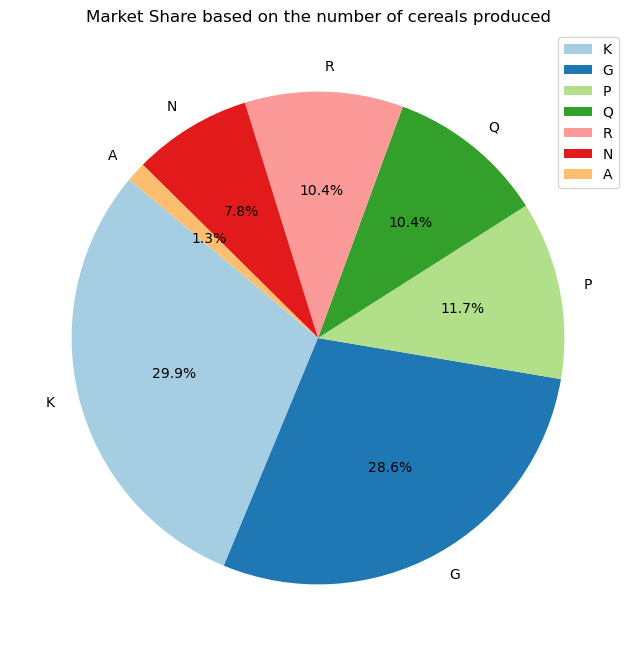

In [11]:
#visualization using pandas
plt.figure(figsize=(10, 8))
MS.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(MS))))
plt.title('Market Share based on the number of cereals produced')
plt.ylabel('')  # Hide y-label
plt.legend()
plt.show()

In [8]:
# number of hot and cold cereals
HNC=df.type.value_counts()
HNC

type
C    74
H     3
Name: count, dtype: int64

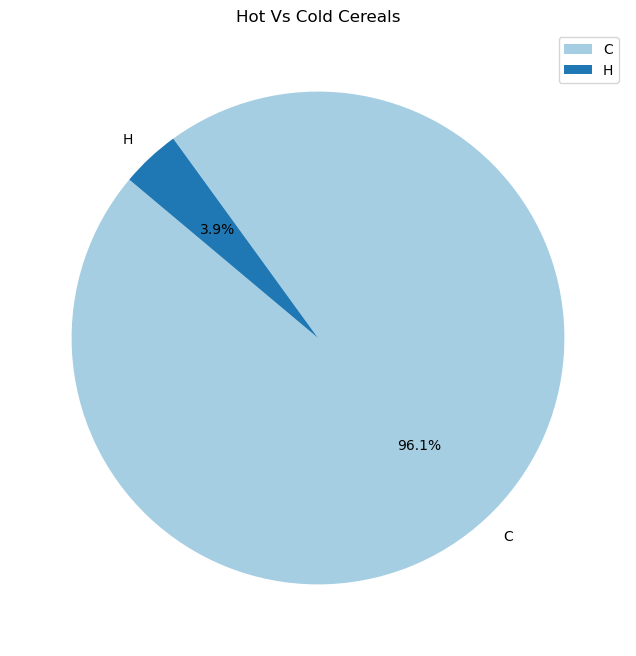

In [10]:
#visualization using pandas
plt.figure(figsize=(10, 8))
HNC.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(HNC))))
plt.title('Hot Vs Cold Cereals')
plt.ylabel('')  # Hide y-label
plt.legend()
plt.show()

In [12]:
# descriptive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
calories,77.0,106.883117,19.484119,50.000000,100.000000,110.000000,110.000000,160.000000
protein,77.0,2.545455,1.094790,1.000000,2.000000,3.000000,3.000000,6.000000
fat,77.0,1.012987,1.006473,0.000000,0.000000,1.000000,2.000000,5.000000
sodium,77.0,159.675325,83.832295,0.000000,130.000000,180.000000,210.000000,320.000000
fiber,77.0,2.151948,2.383364,0.000000,1.000000,2.000000,3.000000,14.000000
carbo,77.0,14.597403,4.278956,-1.000000,12.000000,14.000000,17.000000,23.000000
sugars,77.0,6.922078,4.444885,-1.000000,3.000000,7.000000,11.000000,15.000000
potass,77.0,96.077922,71.286813,-1.000000,40.000000,90.000000,120.000000,330.000000
vitamins,77.0,28.246753,22.342523,0.000000,25.000000,25.000000,25.000000,100.000000
shelf,77.0,2.207792,0.832524,1.000000,1.000000,2.000000,3.000000,3.000000


In [105]:
# Compare the nutritional profiles of cereals from different manufacturers.
# number of unique manufactuers
df.mfr.nunique()

7

In [107]:
# since there are only 3 hot cereals, comparison will not stand any value
# just finding the hot cereals
df[df.type=='H']

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
20,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.0,1.00,65
43,Maypo,A,H,100,4,1,0,0.0,16.0,3,95,25,2,1.0,1.00,55
57,Quaker Oatmeal,Q,H,100,5,2,0,2.7,-1.0,-1,110,0,1,1.0,0.67,51


In [110]:
# Determine if there's a correlation between weight, serving size, and nutritional content.
corr_matrix=df[['weight','cups']+nutritional_cols].corr()
corr_matrix

,weight,cups,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,calories
weight,1.000000,-0.199583,0.216158,0.214625,0.308576,0.247226,0.135136,0.450648,0.416303,0.320324,0.696091
cups,-0.199583,1.000000,-0.244469,-0.175892,0.119665,-0.513061,0.363932,-0.032358,-0.495195,0.128405,0.087200
protein,0.216158,-0.244469,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335,0.019066
fat,0.214625,-0.175892,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156,0.498610
sodium,0.308576,0.119665,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477,0.300649
fiber,0.247226,-0.513061,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243,-0.293413
carbo,0.135136,0.363932,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148,0.250681
sugars,0.450648,-0.032358,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137,0.562340
potass,0.416303,-0.495195,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699,-0.066609
vitamins,0.320324,0.128405,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000,0.265356


In [111]:
# columns with lowest correlation
corr_matrix.idxmin()
# these pairs have inverse proportion relationship between them

weight        cups
cups         fiber
protein     sugars
fat          carbo
sodium       fiber
fiber         cups
carbo        fiber
sugars       carbo
potass        cups
vitamins     fiber
calories     fiber
dtype: object

In [112]:
# columns with highest correlation
# temporarily removing the values of 1 since that will be the highest correlation value with the same column itself
corr_matrix.replace(1,0).idxmax()
# these pairs will be having directly proportional relationship

weight      calories
cups           carbo
protein       potass
fat         calories
sodium      vitamins
fiber         potass
carbo           cups
sugars      calories
potass         fiber
vitamins      sodium
calories      weight
dtype: object

In [113]:
# Identify cereals with high sugar content.
# find the average sugar content and max sugar content
df.sugars.mean(), df.sugars.max()

(6.922077922077922, 15)

In [5]:
# lets consider range between 8 to 15 be HIGH
highsugar= df[(df.sugars>=8) & (df.sugars<=15)]
highsugar

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.384843
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562
10,Cap'n'Crunch,Q,C,120,1,2,220,0.0,12.0,12,35,25,2,1.00,0.75,18.042851
12,Cinnamon Toast Crunch,G,C,120,1,3,210,0.0,13.0,9,45,25,2,1.00,0.75,19.823573
14,Cocoa Puffs,G,C,110,1,1,180,0.0,12.0,13,55,25,2,1.00,1.00,22.736446
17,Corn Pops,K,C,110,1,0,90,1.0,13.0,12,20,25,2,1.00,1.00,35.782791
18,Count Chocula,G,C,110,1,1,180,0.0,12.0,13,65,25,2,1.00,1.00,22.396513


In [6]:
# categorize which manufacturer has high sugar content in them
highsugar.mfr.value_counts()

mfr
G    14
K    10
P     5
Q     3
R     3
Name: count, dtype: int64

In [7]:
# certainly low rating for high sugar content
highsugar.rating.describe()

count    35.000000
mean     31.518039
std       6.034811
min      18.042851
25%      28.309275
50%      31.435973
75%      36.181877
max      41.015492
Name: rating, dtype: float64

In [8]:
# high sugar content cereals which got the lowest rating and ones which got the highest rating
# highest ones
highsugar[highsugar.rating==highsugar.rating.max()]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
28,Fruitful Bran,K,C,120,3,0,240,5.0,14.0,12,190,25,3,1.33,0.67,41.015492


In [9]:
# lowest one
highsugar[highsugar.rating==highsugar.rating.min()]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
10,Cap'n'Crunch,Q,C,120,1,2,220,0.0,12.0,12,35,25,2,1.0,0.75,18.042851


In [10]:
# Investigate the levels of potassium and sodium in cereals.
df[['potass','sodium']].describe()

,potass,sodium
count,77.000000,77.000000
mean,96.077922,159.675325
std,71.286813,83.832295
min,-1.000000,0.000000
25%,40.000000,130.000000
50%,90.000000,180.000000
75%,120.000000,210.000000
max,330.000000,320.000000


In [11]:
# Healthy cereal has less sodium and high potassium content.
# average potassium content is 96, so high range should be greater than 96
# average sodium content is 159 , so lower range to 0 to 159
healthyoptions=df[(df.sodium<=159) & (df.potass>=96)]
healthyoptions

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
13,Clusters,G,C,110,3,2,140,2.0,13.0,7,105,25,3,1.0,0.50,40.400208
19,Cracklin' Oat Bran,K,C,110,3,3,140,4.0,10.0,7,160,25,3,1.0,0.50,40.448772
22,Crispy Wheat & Raisins,G,C,100,2,1,140,2.0,11.0,10,120,25,3,1.0,0.75,36.176196
26,Frosted Mini-Wheats,K,C,100,3,0,0,3.0,14.0,7,100,25,2,1.0,0.80,58.345141
34,Great Grains Pecan,P,C,120,3,3,75,3.0,13.0,4,100,25,3,1.0,0.33,45.811716
44,Muesli Raisins; Dates; & Almonds,R,C,150,4,3,95,3.0,16.0,11,170,25,3,1.0,1.00,37.136863
45,Muesli Raisins; Peaches; & Pecans,R,C,150,4,3,150,3.0,16.0,11,170,25,3,1.0,1.00,34.139765


In [127]:
# check some statistics of these healthy cereals
# average nutritional content values
for col in nutritional_cols:
    print(f'Average {col} content: {healthy_options[col].mean()}')

Average protein content: 3.2941176470588234

Average fat content: 1.6470588235294117

Average sodium content: 85.29411764705883

Average fiber content: 3.835294117647059

Average carbo content: 12.264705882352942

Average sugars content: 6.0588235294117645

Average potass content: 150.58823529411765

Average vitamins content: 19.11764705882353

Average calories content: 106.47058823529412


In [133]:
# numeric statistics rating for these healthy options
healthy_options.rating.describe()

count    17.000000
mean     50.588235
std      17.751968
min      30.000000
25%      37.000000
50%      46.000000
75%      58.000000
max      94.000000
Name: rating, dtype: float64

In [135]:
# manufacturer counts for the healthy options
healthy_options.mfr.value_counts() # Kelloggs leading the way

mfr
K    5
N    3
Q    3
G    3
R    2
P    1
Name: count, dtype: int64

In [137]:
# lets see if potassium and sodium content has correlation with rating
df[['potass','sodium','rating']].corr()
# sodium has negative correlation with rating
# potassium has positive correlation with rating

,potass,sodium,rating
potass,1.000000,-0.032603,0.377594
sodium,-0.032603,1.000000,-0.398521
rating,0.377594,-0.398521,1.000000


In [138]:
# Analyze the distribution of vitamins in cereals.
df.vitamins.describe()

count     77.000000
mean      28.246753
std       22.342523
min        0.000000
25%       25.000000
50%       25.000000
75%       25.000000
max      100.000000
Name: vitamins, dtype: float64

In [139]:
# relation of vitamins with rating
df[['vitamins','rating']].corr()
# negative correlation

,vitamins,rating
vitamins,1.000000,-0.236428
rating,-0.236428,1.000000
